In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scipy
from scipy.stats.qmc import Sobol
from scipy.stats import qmc
import matplotlib.pyplot as plt
import sys
sys.path.append('../../sample_utilities')
import samples
import json

In [3]:
seed = 42
m_samples = 5 # 2**m_samples = n_samples
target_volume = 1700
target_dilution = 0.1 # mol Si/L saxs sample
samples_write_fp = 'SampleTable_RandomSobol_2025_01_13.csv'

## Generate a Sobol sequence as random samples

In [4]:
sampler = Sobol(d=3, seed = seed)

In [5]:
sampled_points = sampler.random_base2(m_samples)

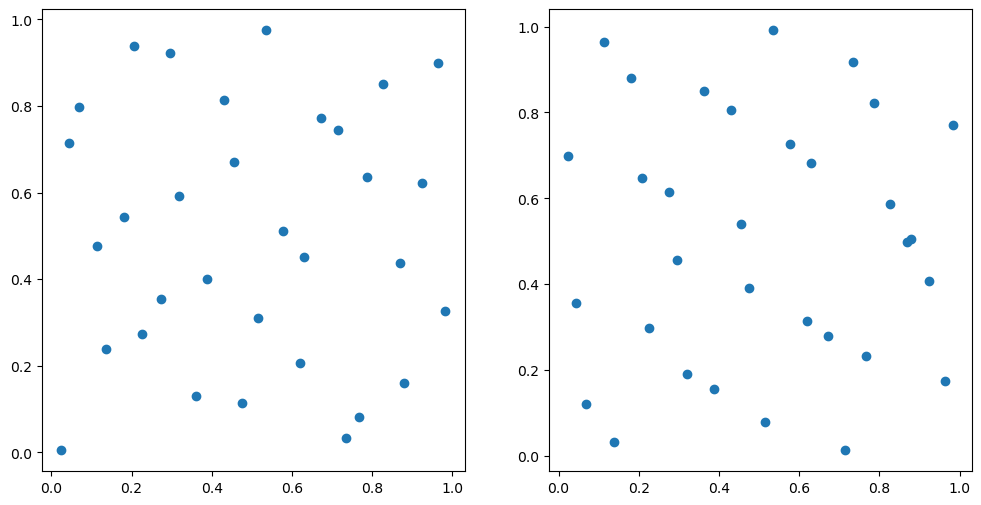

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))
ax[0].scatter(sampled_points[:,0], sampled_points[:,1])
ax[1].scatter(sampled_points[:,0], sampled_points[:,2])

### Calculate volumes from samples 

In [7]:
with open('constants_Round2_2025_01_13.json', 'rt') as f:
    constants = json.load(f)

In [8]:
lower_bounds = [constants['TEOS']['minimum_volume_fraction'], constants['ammonia']['minimum_volume_fraction'], constants['water']['minimum_volume_fraction']]
upper_bounds = [constants['TEOS']['maximum_volume_fraction'], constants['ammonia']['maximum_volume_fraction'], constants['water']['maximum_volume_fraction']]

In [9]:
lower_bounds

[0.005, 0.005, 0.005]

In [10]:
upper_bounds

[0.1, 0.1, 0.15]

In [11]:
sampled_volume_fractions = qmc.scale(sampled_points, lower_bounds, upper_bounds)

In [12]:
# sanity check teos scaling

scaled_teos = ((constants['TEOS']['maximum_volume_fraction'] - constants['TEOS']['minimum_volume_fraction'])*sampled_points[:,0]) + constants['TEOS']['minimum_volume_fraction']

In [13]:
scaled_teos

array([0.0459478 , 0.08763229, 0.05990197, 0.01800232, 0.00912246,
       0.07471929, 0.09656497, 0.03107766, 0.03531909, 0.088601  ,
       0.06886003, 0.0157355 , 0.02466746, 0.05399062, 0.07972042,
       0.05013713, 0.0482479 , 0.07789857, 0.05590812, 0.02646104,
       0.01159669, 0.06483499, 0.09272169, 0.03936225, 0.0329928 ,
       0.09836054, 0.07283386, 0.00729717, 0.02212101, 0.06394748,
       0.08349692, 0.04191896])

In [14]:
sampled_volume_fractions

array([[0.0459478 , 0.08236496, 0.12192985],
       [0.08763229, 0.04656197, 0.07731653],
       [0.05990197, 0.05346531, 0.11033816],
       [0.01800232, 0.0276775 , 0.00961522],
       [0.00912246, 0.07292293, 0.05664554],
       [0.07471929, 0.00817318, 0.13807526],
       [0.09656497, 0.09032157, 0.03029077],
       [0.03107766, 0.03855866, 0.09419731],
       [0.03531909, 0.06113948, 0.0327094 ],
       [0.088601  , 0.02012525, 0.07819003],
       [0.06886003, 0.07834389, 0.0454339 ],
       [0.0157355 , 0.05032228, 0.14475853],
       [0.02466746, 0.09413985, 0.09885674],
       [0.05399062, 0.03457238, 0.0165597 ],
       [0.07972042, 0.06542865, 0.12407869],
       [0.05013713, 0.01588215, 0.06157046],
       [0.0482479 , 0.06860217, 0.08334634],
       [0.07789857, 0.01274935, 0.03873298],
       [0.05590812, 0.09759895, 0.14878424],
       [0.02646104, 0.03098006, 0.04806126],
       [0.01159669, 0.08073576, 0.02258771],
       [0.06483499, 0.04788931, 0.10401747],
       [0.

## Collate volume fractions into samples and get sample information

In [38]:
samples_gen = []
for i in range(2**m_samples):
    row = sampled_volume_fractions[i,:]
    sample = samples.SolidSilicaSample(target_volume=target_volume, reactant_fp='./constants_Round2_2025_01_13.json', teos_vol_frac=row[0], ammonia_vol_frac=row[1], water_vol_frac=row[2])
    sample.calculate_reactant_volumes()
    sample.calculate_silica_mass_concentration()
    sample.calculate_silica_mass_fraction()
    sample.calculate_dilution_volumefraction(target_dilution)
    samples_gen.append(sample)
    print('final etoh vol: ', sample.ethanol_volume)

787.0130040596473
final etoh vol:  487.57456131351637
665.201420343481
final etoh vol:  675.2302443357185
703.5535964415642
final etoh vol:  616.1471622386716
173.90288788964975
final etoh vol:  1432.095551088918
436.1829593688482
final etoh vol:  1028.042467999342
694.943506968068
final etoh vol:  629.4113541302736
683.0226429205622
final etoh vol:  647.7759284737285
515.2567725631875
final etoh vol:  906.226053078333
406.23328597680666
final etoh vol:  1074.1811540357303
587.851721871947
final etoh vol:  794.3905906297033
605.8459366120865
final etoh vol:  766.6697733273263
663.0173101710388
final etoh vol:  678.5949546013726
684.5534188375809
final etoh vol:  645.4177061150781
330.61088764306623
final etoh vol:  1190.6805244417628
846.7212888156064
final etoh vol:  395.5915280408226
401.2697696557501
final etoh vol:  1081.8276521519524
629.6177234458272
final etoh vol:  730.0483719888608
406.90295143725814
final etoh vol:  1073.1495072453054
950.706152701797
final etoh vol:  235.398

In [39]:
samples_gen

In [40]:
sample.teos_volume

np.float64(203.09736000162084)

In [41]:
sampled_volume_fractions

array([[0.0459478 , 0.08236496, 0.12192985],
       [0.08763229, 0.04656197, 0.07731653],
       [0.05990197, 0.05346531, 0.11033816],
       [0.01800232, 0.0276775 , 0.00961522],
       [0.00912246, 0.07292293, 0.05664554],
       [0.07471929, 0.00817318, 0.13807526],
       [0.09656497, 0.09032157, 0.03029077],
       [0.03107766, 0.03855866, 0.09419731],
       [0.03531909, 0.06113948, 0.0327094 ],
       [0.088601  , 0.02012525, 0.07819003],
       [0.06886003, 0.07834389, 0.0454339 ],
       [0.0157355 , 0.05032228, 0.14475853],
       [0.02466746, 0.09413985, 0.09885674],
       [0.05399062, 0.03457238, 0.0165597 ],
       [0.07972042, 0.06542865, 0.12407869],
       [0.05013713, 0.01588215, 0.06157046],
       [0.0482479 , 0.06860217, 0.08334634],
       [0.07789857, 0.01274935, 0.03873298],
       [0.05590812, 0.09759895, 0.14878424],
       [0.02646104, 0.03098006, 0.04806126],
       [0.01159669, 0.08073576, 0.02258771],
       [0.06483499, 0.04788931, 0.10401747],
       [0.

In [42]:
sample.ethanol_volume


np.float64(1155.4004074364434)

In [43]:
v_etoh_add = 0.649*(sample.teos_volume + sample.ammonia_volume + sample.water_volume)

In [44]:
v_etoh_add

np.float64(353.4451355737482)

In [45]:
sample.teos_vol_frac + sample.water_vol_frac + sample.ammonia_vol_frac

np.float64(0.11240445666946469)

In [46]:
sample.ammonia_volume

np.float64(208.15920914746818)

In [47]:
sample.water_volume

np.float64(133.34302341446747)

In [48]:
sample.ethanol_vol_frac

np.float64(0.8875955433305353)

In [49]:
sample.teos_vol_frac

np.float64(0.04191895975265652)

In [50]:
sample.water_vol_frac

np.float64(0.027521779858507216)

In [51]:
sample.ammonia_vol_frac

np.float64(0.04296371705830097)

In [52]:
sample.target_volume

1700

In [53]:
sampled_volume_fractions.sum(axis = 1)

array([0.25024261, 0.21151079, 0.22370544, 0.05529504, 0.13869093,
       0.22096773, 0.21717731, 0.16383363, 0.12916798, 0.18691629,
       0.19263782, 0.21081631, 0.21766404, 0.1051227 , 0.26922775,
       0.12758975, 0.20019641, 0.12938091, 0.3022913 , 0.10550235,
       0.11492017, 0.21674177, 0.22091192, 0.18488068, 0.19684785,
       0.25110848, 0.15545338, 0.11892747, 0.2115429 , 0.13897816,
       0.25934508, 0.11240446])

In [54]:
synth_table = samples.generate_synthesis_table(samples_gen)

In [55]:
synth_table

,uuid,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction
0,c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890
1,3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651
2,0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498
3,82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080
4,9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029
5,d263a9a8-70c2-49a4-badb-03a72fa16632,362.014946,39.599052,668.974648,629.411354,0.298737,20.111324,0.024235
6,586ae478-4dab-4d7d-9382-ab359a49387a,467.857264,437.608025,146.758782,647.775928,0.231155,25.991272,0.031714
7,7386215f-7150-48a6-b35f-96cbe5b743cf,150.571271,186.816687,456.385989,906.226053,0.718247,8.364814,0.010229
8,d408858a-bbae-4227-8e64-6c368a1f3398,171.120992,296.220804,158.477050,1074.181154,0.631993,9.506430,0.011766
9,0c042bd5-e5ed-4460-9bb9-d8556dba293c,429.271862,97.506840,378.830708,794.390591,0.251932,23.847704,0.029060


In [56]:
rows = ['A', 'B', 'C', 'D', 'E', 'F']
cols = [1, 2, 3, 4, 5, 6, 7, 8]

wells = []
for row in rows:
    for col in cols:
        if row in ['B', 'E'] and col in [2, 7]:
            pass
        else:
            wells.append(row + str(col))

In [58]:
synth_table['well'] = wells[0:len(synth_table)]

In [59]:
synth_table

,uuid,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well
0,c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1
1,3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2
2,0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3
3,82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4
4,9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5
5,d263a9a8-70c2-49a4-badb-03a72fa16632,362.014946,39.599052,668.974648,629.411354,0.298737,20.111324,0.024235,A6
6,586ae478-4dab-4d7d-9382-ab359a49387a,467.857264,437.608025,146.758782,647.775928,0.231155,25.991272,0.031714,A7
7,7386215f-7150-48a6-b35f-96cbe5b743cf,150.571271,186.816687,456.385989,906.226053,0.718247,8.364814,0.010229,A8
8,d408858a-bbae-4227-8e64-6c368a1f3398,171.120992,296.220804,158.477050,1074.181154,0.631993,9.506430,0.011766,B1
9,0c042bd5-e5ed-4460-9bb9-d8556dba293c,429.271862,97.506840,378.830708,794.390591,0.251932,23.847704,0.029060,B3


In [60]:
synth_table.to_csv(samples_write_fp)